<a href="https://colab.research.google.com/github/adrita23/Machine-Learning-Assignments/blob/main/ML_Fall_21_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 1 
#Date: 22-09-2021
#Author: Adrita Anika

In [2]:
#Question 1 

## part a: Data Exploration

### a.i: Using the training data, compute the number of samples belonging to each class.  Are the classes equally distributed?


Question 1: part a


*   Mounting Drive
*   Importing Data



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ML HW/data_train.csv', header=None) 

In [6]:
data.head()


,0,1,2,3
0,38,66,0,1
1,38,66,11,1
2,38,60,1,1
3,38,67,5,1
4,39,66,0,2


In [7]:
#a.i : compute the number of samples belonging to each class

no_of_samples = data.loc[:,3].value_counts()

print("The number of samples for class- 1 is ", no_of_samples[1])
print("The number of samples for class- 2 is ", no_of_samples[2])

The number of samples for class- 1 is  173
The number of samples for class- 2 is  72


a.i : The classes are not equally distributed

Text(0.5, 1.0, 'Number of positive axillary lymph nodes')

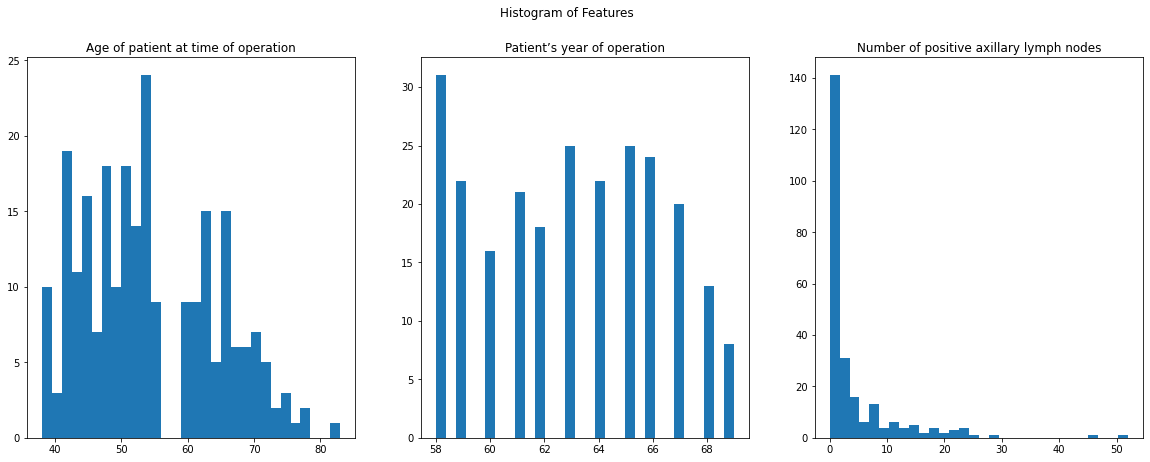

In [8]:
#a.ii : plot the histogram of eachfeature (i.e.,  3 total histograms).

fig, axs = plt.subplots(1,3, figsize =(20, 7))
fig.suptitle('Histogram of Features')

feature_1 = axs[0].hist(data.loc[:,0], bins= 30)
axs[0].set_title("Age of patient at time of operation")
feature_2 = axs[1].hist(data.loc[:,1], bins= 30)
axs[1].set_title('Patient’s year of operation')
feature_3 = axs[2].hist(data.loc[:,2], bins= 30)
axs[2].set_title('Number of positive axillary lymph nodes')

a.ii. 
1.  Age of patient at time of operation has multimodal distrubution
2.  Patient’s year of operation has uniform/ unimodal??
3.  Number of positive axillary lymph nodes detected has unimodal distribution

Text(0, 0.5, 'Number of positive axillary lymph nodes')

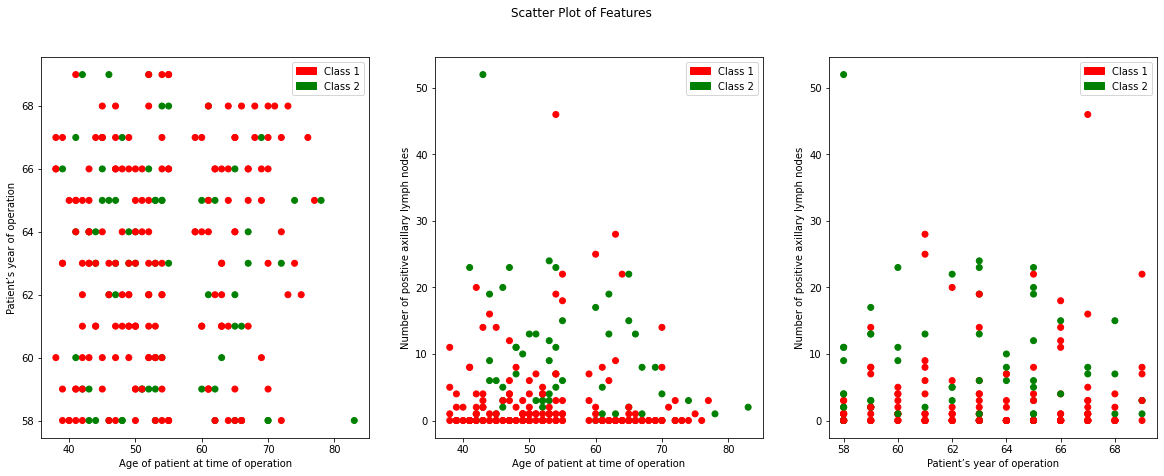

In [9]:
#a.iii
'''
data_num = data.loc[:,3].to_numpy
idx_1 = np.where(data.loc[:,3]==1)
idx_2 = np.where(data.loc[:,3] ==2)
'''
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1,3, figsize= (20,7)) 
fig.suptitle('Scatter Plot of Features')
colors = {1: 'red', 2: 'green'}

ax[0].scatter(data.loc[:,0], data.loc[:, 1], c = data.loc[:,3].map(colors))
pop_a = mpatches.Patch(color='red', label='Class 1')
pop_b = mpatches.Patch(color='green', label='Class 2')
ax[0].legend(handles=[pop_a,pop_b])
#ax[0].set_title('damped')
ax[0].set_xlabel('Age of patient at time of operation')
ax[0].set_ylabel('Patient’s year of operation')

ax[1].scatter(data.loc[:,0], data.loc[:, 2], c = data.loc[:,3].map(colors))
ax[1].legend(handles=[pop_a,pop_b])
ax[1].set_xlabel('Age of patient at time of operation')
ax[1].set_ylabel('Number of positive axillary lymph nodes')

ax[2].scatter(data.loc[:,1], data.loc[:, 2], c = data.loc[:,3].map(colors))
ax[2].legend(handles=[pop_a,pop_b])
ax[2].set_xlabel('Patient’s year of operation')
ax[2].set_ylabel('Number of positive axillary lymph nodes')




